# NAIROBI AIR QUALITY MONITORING - PREDICTING PM2.5 CONCENTRATION
---


## Background of the Study

The world has been experiencing the biggest wave of urban growth in history[1]. Currently, over 50 per cent of the global population lives in urban areas- this is 3.9 billion, and by 2030, this number will rise to about 5 billion[1]. From an estimated 237 million in 1995 to an estimated 472 million in 2015, Africa experienced an average
urban growth of 3.44% per year[2]. Rapid industrialization and urbanization is associated with extremely severe air pollution that causes increasing negative effects on human health, visibility,and climate change[3].

According to World Health Organization, air pollution is associated with 7 million premature deaths annually [4]. In Kenya, approximately 19,112 die from air pollution, with
6,672 being children yearly[5]. Among these air pollutants, we have PM2.5 which can traversethe nasal passages thus bringing about a great threat to the human body [4].The study conducted by [6] in 2018 proposed that PM2.5 concentrations above minimum exposure levels caused 22% of infant deaths in the 30 countries that he was investigating [6].

With the growing of evidence linking air pollution to adverse health outcomes, an urgency arises on finding sustainable and innovative solutions. Predictive modeling stands as a promising avenue for facilitating timely public health interventions. By leveraging predictive modeling techniques, we can anticipate air pollution trends, identify high-risk areas, and implement targeted interventions to mitigate its impact on human health and the environment. Predicting air quality is a complex task due to the dynamic nature, volatility, and high variability in time and space of pollutants and particulates [7]. Based on the reviewed literature on Machine Learning Applications in Air Pollution. To the best of our knowledge,  no work was done involving the analysis and prediction of air pollution in Nairobi. Therefore this study intends to predict PM 2.5 concentration using linear machine learning models.

## Research objectives

1. To fit linear models.

2. To evaluate the models

3. To optimize the best model.

## Research Questions

1. How accurately can linear models predict PM2.5 concentrations in Nairobi?

2. How does the performance of different linear models compare in predicting PM2.5 concentrations?

3.  Can optimizing the parameters of linear models significantly improve their predictive accuracy?

4. What has been the progression/ trend of PM 2.5 concentration over the years?


## Data Description

This project intends to use data from Sensors Africa. Sensors AFRICA is a pan-African citizen science initiative that uses sensors to monitor air, water and sound pollution to give citizens actionable information about their cities. Sensors Africa uses low-cost air quality sensors to collect data on air pollution. The sensors are distributed in different areas within Nairobi.The sensors data is open source and can be found at: https://open.africa/dataset/sensorsafrica-airquality-archive-nairobi. The data has been collected from June 2017 to March 2024. The data is recorded at an interval of seconds from the different sensors on a daily basis. The specific variables found in the dataset are defined in the table below:

| Column Name| Description| Units | Sample Values |
|---- |----|----|----|
| Sensor_id  | Unique identifier used to differentiate the sensors within a network |-|49 |
| Sensor_type |The dataset has two types of sensors used: pms5003 (is a specific model of particulate matter (PM) sensor commonly used for air quality monitoring) and DHT22 ( is a type of sensor commonly used to measure temperature and humidity in the air) |- |pms5003, DHT22 |
| location  |  Location where the sensor is deployed, represented as numeric codes | -| 3573, 3612|
| lat  |Latitude coordinate of the sensor's location  | - | -1.296 |
| lon |Longitude coordinate of the sensor's location|-|36.776 |
|Timestamp|The date and time when the measurement was recorded by a particular sensor.|-|2024-01-01T00:12:22.156424+00:00|
|Value_type|Indicates the type of value being measured by the sensor. Where P0 in the data represents PM1, P2 represents PM2.5, and P1 represents PM10|- | P2, humidity,temperature |
|Value|The actual measurement value recorded by the sensor corresponding to the "value_type"| µg/m³, Temperature (C), Humidity (%) |P2 = 22.4µg/m³ |

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
# Python library for geographic coordinates
import folium

data = pd.read_csv('jan2024.csv',sep=';',parse_dates=['timestamp'], index_col='timestamp')
df =data.head(50)

# Checking for missing values in the data set
data.isnull().sum()


sensor_id      0
sensor_type    0
location       0
lat            0
lon            0
value_type     0
value          0
dtype: int64

## Visualizing the location of the sensors based on the Location, Lat,Longitude - for the first 50 Observations

In [145]:
map = folium.Map(location = [-1.299771218964288, 36.88789878128533],zoom_start =12)
# Add markers for each sensor
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=folium.Popup(f"Location: {row['location']}", max_width=300),
        tooltip=f"Location: {row['location']}"
    ).add_to(map)

# Display the map
map

## Location Based Analysis

In [146]:
##getting the unique sensors
data['location'].value_counts()

location
3573    375573
35       72001
3612     67785
76       33351
3626     30964
Name: count, dtype: int64

### Daily resampling - Jan 2024

#### Location = 76

In [147]:
# Creating a dataframe for the 3573 location
df1= data[data['location'] == 76]
df1['sensor_id'].value_counts()


sensor_id
174    20457
173    12894
Name: count, dtype: int64

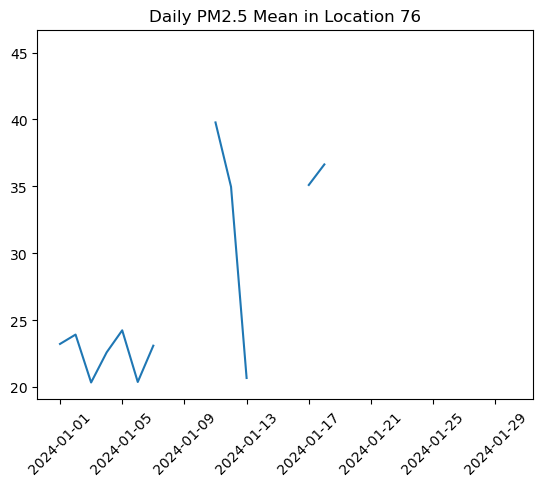

In [148]:
# Extracting PM2.5 data
pm2= df1[df1['value_type'] == 'P2']

# Resampling the data to weekly
pm2_resampled = pm2['value'].resample('D').mean()
pm2 = pm2_resampled.reset_index()

# Time series plot
plt.plot(pm2['timestamp'], pm2['value'], )  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean in Location 76')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()


#### Location = 3573

In [149]:
# Creating a dataframe for the 3573 location
df2= data[data['location'] == 3573]
df2['sensor_id'].value_counts()

sensor_id
49    225309
50    150264
Name: count, dtype: int64

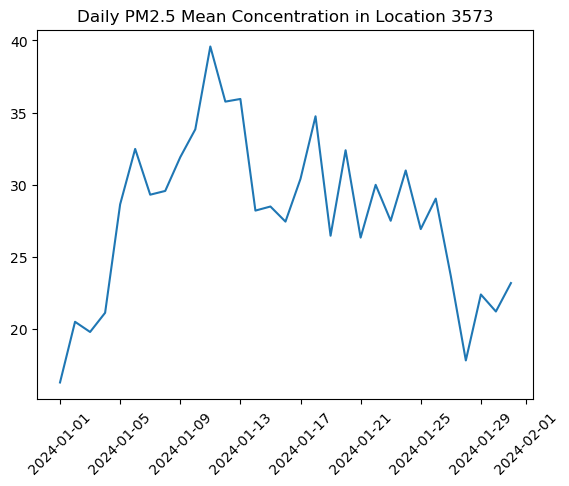

In [150]:
# Extracting PM2.5 data
pm2= df2[df2['value_type'] == 'P2']

# Resampling the data to weekly
pm2_resampled = pm2['value'].resample('D').mean()
pm2 = pm2_resampled.reset_index()

# Time series plot
plt.plot(pm2['timestamp'], pm2['value'], )  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean Concentration in Location 3573')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()

#### Location = 35

In [151]:
# Creating a dataframe for the 3573 location
df3= data[data['location'] == 35]
df3['sensor_id'].value_counts()

sensor_id
800    44211
801    27790
Name: count, dtype: int64

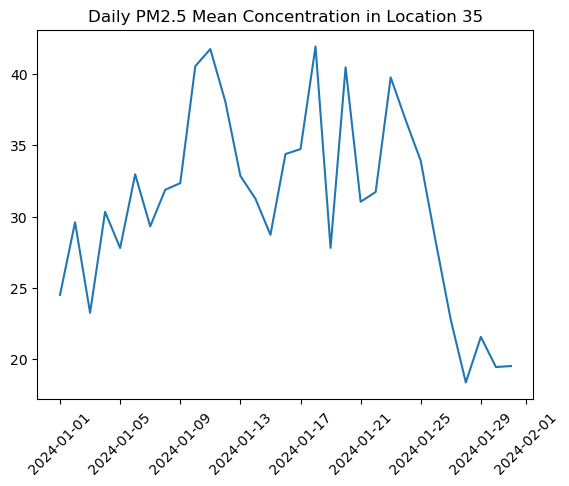

In [152]:
# Extracting PM2.5 data
pm2= df3[df3['value_type'] == 'P2']

# Resampling the data to weekly
pm2_resampled = pm2['value'].resample('D').mean()
pm2 = pm2_resampled.reset_index()

# Time series plot
plt.plot(pm2['timestamp'], pm2['value'], )  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean Concentration in Location 35')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()


#### Location = 3612

In [153]:
# Creating a dataframe for the 3573 location
df4= data[data['location'] == 3612]
df4['sensor_id'].value_counts()

sensor_id
178    40641
177    27144
Name: count, dtype: int64

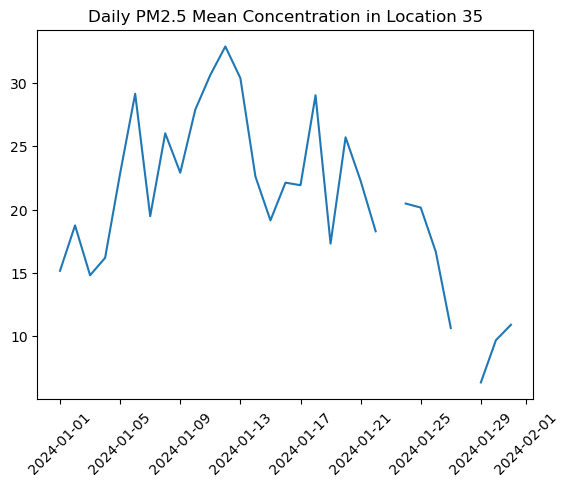

In [154]:
# Extracting PM2.5 data
pm2= df4[df4['value_type'] == 'P2']

# Resampling the data to weekly
pm2_resampled = pm2['value'].resample('D').mean()
pm2 = pm2_resampled.reset_index()

# Time series plot
plt.plot(pm2['timestamp'], pm2['value'], )  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean Concentration in Location 35')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()


#### Location = 3626

In [155]:
# Creating a dataframe for the 3573 location
df5= data[data['location'] == 3626]
df5['sensor_id'].value_counts()

sensor_id
4849    18828
4850    12136
Name: count, dtype: int64

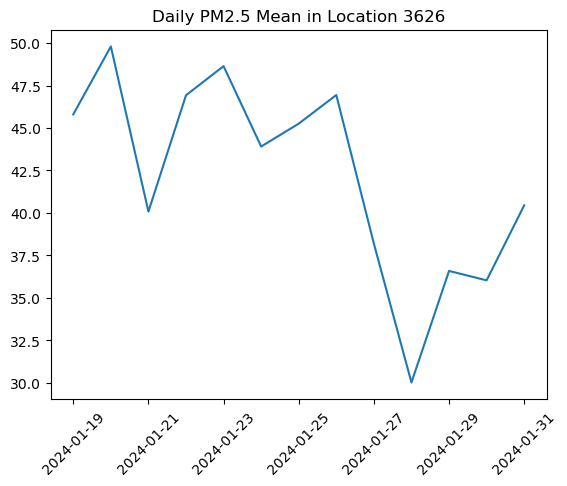

In [156]:
# Extracting PM2.5 data
pm2= df5[df5['value_type'] == 'P2']

# Resampling the data to weekly
pm2_resampled = pm2['value'].resample('D').mean()
pm2 = pm2_resampled.reset_index()

# Time series plot
plt.plot(pm2['timestamp'], pm2['value'], )  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean in Location 3626')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()


**Observations made**

- For the dataset in Jan 2024, 5 locations were considered. (Is this the case for the othe months)
- In some locations, the sensors did not record any data on a particular day - ( Could it be that the sensors were faulty?)

## Value - type based analysis

In [157]:
data

,sensor_id,sensor_type,location,lat,lon,value_type,value
timestamp,,,,,,,
2024-01-01 00:00:10.062960+00:00,49,pms5003,3573,-1.289,36.825,P2,22.4
2024-01-01 00:00:10.062960+00:00,49,pms5003,3573,-1.289,36.825,P1,26.0
2024-01-01 00:00:10.062960+00:00,49,pms5003,3573,-1.289,36.825,P0,13.0
2024-01-01 00:00:10.971928+00:00,50,DHT22,3573,-1.289,36.825,humidity,99.9
2024-01-01 00:00:10.971928+00:00,50,DHT22,3573,-1.289,36.825,temperature,19.7
...,...,...,...,...,...,...,...
2024-01-31 23:59:24.169254+00:00,49,pms5003,3573,-1.289,36.825,P2,8.8
2024-01-31 23:59:24.169254+00:00,49,pms5003,3573,-1.289,36.825,P1,8.8
2024-01-31 23:59:24.169254+00:00,49,pms5003,3573,-1.289,36.825,P0,6.4


In [158]:
data['value_type'].value_counts()

value_type
P2             116482
P1             116482
P0             116482
humidity       115114
temperature    115114
Name: count, dtype: int64

### P2 -> PM 2.5 Concentration

In [164]:
# Creating a dataframe for P2
p2= data[data['value_type'] == 'P2']

# Resampling the data to weekly
p2_resampled = p2['value'].resample('D').mean()
p2 = p2_resampled.reset_index()
p2


,timestamp,value
0,2024-01-01 00:00:00+00:00,17.645869
1,2024-01-02 00:00:00+00:00,22.033215
2,2024-01-03 00:00:00+00:00,19.671563
3,2024-01-04 00:00:00+00:00,21.757227
4,2024-01-05 00:00:00+00:00,27.040868
5,2024-01-06 00:00:00+00:00,32.007881
6,2024-01-07 00:00:00+00:00,27.012628
7,2024-01-08 00:00:00+00:00,29.323802
8,2024-01-09 00:00:00+00:00,29.851187
9,2024-01-10 00:00:00+00:00,33.784291


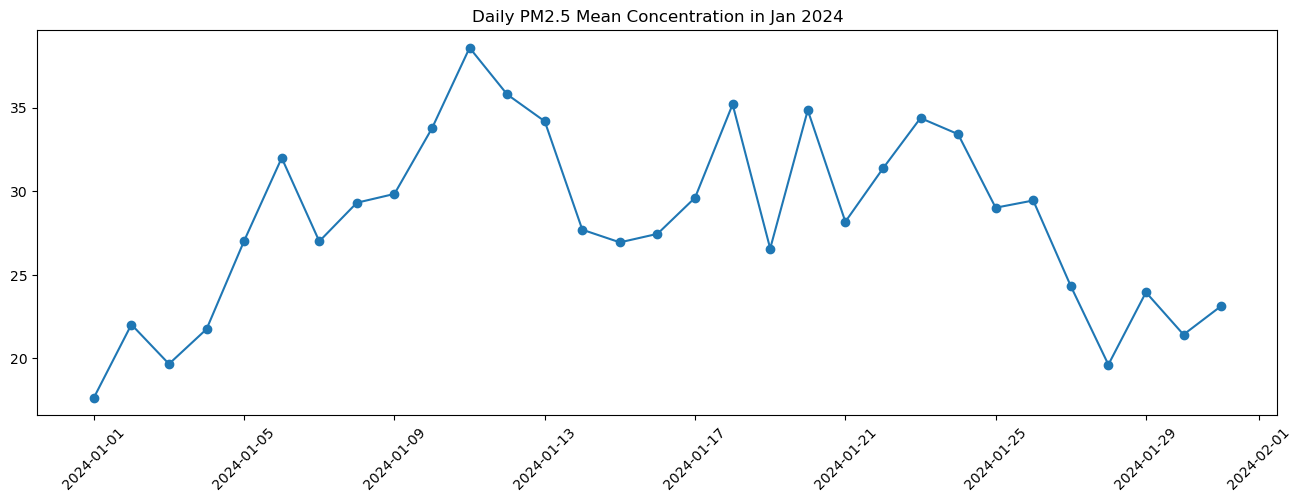

In [169]:
# Time series plot
plt.figure(figsize=(16, 5))
plt.plot(p2['timestamp'], p2['value'], marker='o', linestyle='-')  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM2.5 Mean Concentration in Jan 2024')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()

### P1

In [170]:
# Creating a dataframe for P2
p1= data[data['value_type'] == 'P1']

# Resampling the data to weekly
p1_resampled = p1['value'].resample('D').mean()
p1 = p1_resampled.reset_index()
p1


,timestamp,value
0,2024-01-01 00:00:00+00:00,20.648476
1,2024-01-02 00:00:00+00:00,25.220166
2,2024-01-03 00:00:00+00:00,22.443617
3,2024-01-04 00:00:00+00:00,24.839738
4,2024-01-05 00:00:00+00:00,31.245704
5,2024-01-06 00:00:00+00:00,38.357718
6,2024-01-07 00:00:00+00:00,31.365905
7,2024-01-08 00:00:00+00:00,35.036329
8,2024-01-09 00:00:00+00:00,35.274720
9,2024-01-10 00:00:00+00:00,41.169839


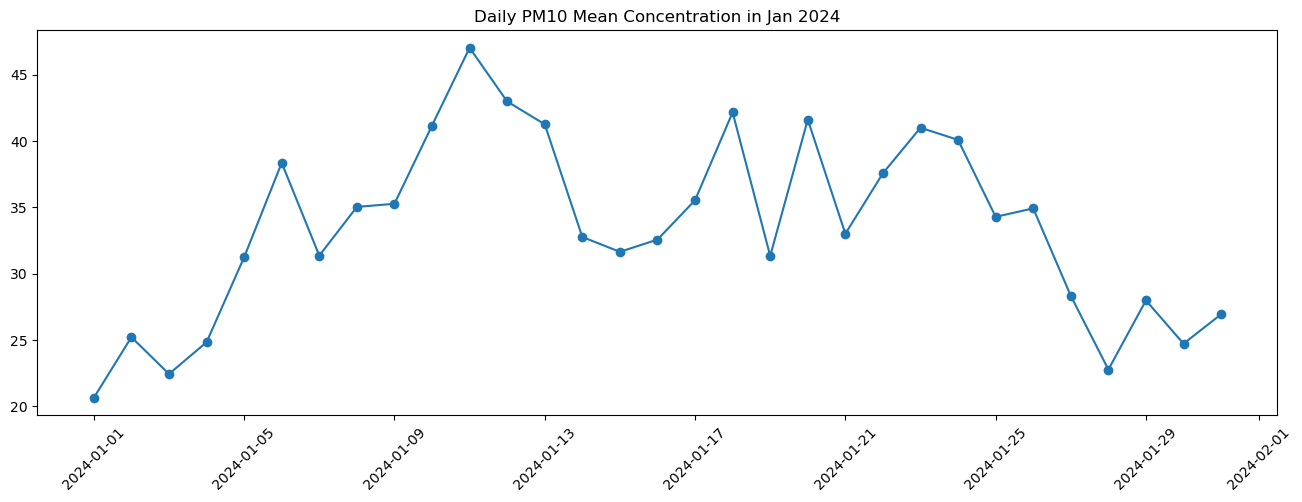

In [171]:
# Time series plot
plt.figure(figsize=(16, 5))
plt.plot(p1['timestamp'], p1['value'], marker='o', linestyle='-')  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily PM10 Mean Concentration in Jan 2024')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()

### Humidity

In [172]:
# Creating a dataframe for P2
humidity= data[data['value_type'] == 'humidity']

# Resampling the data to weekly
humidity_resampled = humidity['value'].resample('D').mean()
humidity = humidity_resampled.reset_index()
humidity


,timestamp,value
0,2024-01-01 00:00:00+00:00,91.444779
1,2024-01-02 00:00:00+00:00,85.212511
2,2024-01-03 00:00:00+00:00,84.693100
3,2024-01-04 00:00:00+00:00,83.417845
4,2024-01-05 00:00:00+00:00,87.848492
5,2024-01-06 00:00:00+00:00,92.688440
6,2024-01-07 00:00:00+00:00,88.628970
7,2024-01-08 00:00:00+00:00,90.803130
8,2024-01-09 00:00:00+00:00,85.390593
9,2024-01-10 00:00:00+00:00,90.708394


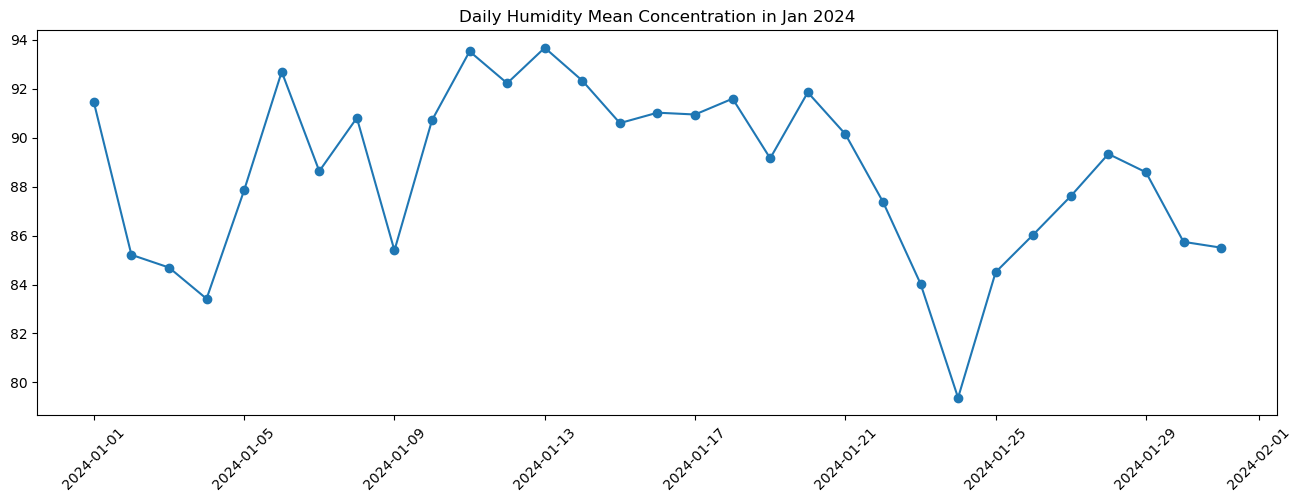

In [173]:
# Time series plot
plt.figure(figsize=(16, 5))
plt.plot(humidity['timestamp'], humidity['value'], marker='o', linestyle='-')  # Explicitly provide data for x and y axes

# Customize the plot
plt.title('Daily Humidity Mean Concentration in Jan 2024')
# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate by 45 degrees
plt.show()

### Check correlation